# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
)
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Import Dataset

In [ ]:
train_url = 'https://docs.google.com/spreadsheets/d/1aQE8UuBwCgROQ_KIhIx1ZWXE4DGnOTm6geTg9yb9qo8/edit#gid=1773092798'
test_url = 'https://docs.google.com/spreadsheets/d/1h8D8TjA4_FhZXAKlzvPIfct5yLQ1Rv_tZrPvcw7EbCM/edit#gid=1778239179'
train_url_trf = train_url.replace('/edit#gid=', '/export?format=csv&gid=')
test_url_trf = test_url.replace('/edit#gid=', '/export?format=csv&gid=')
train = pd.read_csv(train_url_trf)
test = pd.read_csv(test_url_trf)

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
train['state'], _ = pd.factorize(train['state'])
train['area_code'], _ = pd.factorize(train['area_code'])
train['international_plan'], _ = pd.factorize(train['international_plan'])
train['voice_mail_plan'], _ = pd.factorize(train['voice_mail_plan'])
train['churn'], _ = pd.factorize(train['churn'])
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,107,0,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,1,137,0,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0,84,1,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,2,75,0,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,3,121,2,0,0,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
test['state'], _ = pd.factorize(test['state'])
test['area_code'], _ = pd.factorize(test['area_code'])
test['international_plan'], _ = pd.factorize(test['international_plan'])
test['voice_mail_plan'], _ = pd.factorize(test['voice_mail_plan'])
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,0,128,0,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,1,118,1,1,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,2,62,0,0,1,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,3,93,1,0,1,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,4,174,0,0,1,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


# Preprocessing Data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   int64  
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int64  
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
train.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,24.471294,100.236235,0.752471,0.093176,0.738353,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,14.820103,39.698401,0.826656,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,73.000000,0.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,25.000000,100.000000,1.000000,0.000000,1.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,37.000000,127.000000,1.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.000000,243.000000,2.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [ ]:
print(f"Training data has: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Testing data has: {test.shape[0]} rows and {test.shape[1]} columns")

Training data has: 4250 rows and 20 columns
Testing data has: 750 rows and 20 columns


In [ ]:
# looking for missing value

train_missing = train.isnull().sum()
test_missing = test.isnull().sum()

print(train_missing)
print('-------------------------------')
print()
print(test_missing)

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64
-------------------------------

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day

In [ ]:
# looking for inconsistency data by type, and length

for column in train.columns:
    print(f"Column: {column}")
    print(f"  - Data type: {train[column].dtype}")
    print(f"  - Number of non-null values: {train[column].count()}")
    print("----------------------")

Column: state
  - Data type: int64
  - Number of non-null values: 4250
----------------------
Column: account_length
  - Data type: int64
  - Number of non-null values: 4250
----------------------
Column: area_code
  - Data type: int64
  - Number of non-null values: 4250
----------------------
Column: international_plan
  - Data type: int64
  - Number of non-null values: 4250
----------------------
Column: voice_mail_plan
  - Data type: int64
  - Number of non-null values: 4250
----------------------
Column: number_vmail_messages
  - Data type: int64
  - Number of non-null values: 4250
----------------------
Column: total_day_minutes
  - Data type: float64
  - Number of non-null values: 4250
----------------------
Column: total_day_calls
  - Data type: int64
  - Number of non-null values: 4250
----------------------
Column: total_day_charge
  - Data type: float64
  - Number of non-null values: 4250
----------------------
Column: total_eve_minutes
  - Data type: float64
  - Number of no

In [ ]:
# looking for duplicate data

duplicate_train = train[train.duplicated()].sum()
duplicate_test = test[test.duplicated()].sum()

print("Duplicate values in training data:")
print(duplicate_train)

print("\nDuplicate values in testing data:")
print(duplicate_test)

Duplicate values in training data:
state                            0.0
account_length                   0.0
area_code                        0.0
international_plan               0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churn                            0.0
dtype: float64

Duplicate values in testing data:
id                               0.0
state                            0.0
account_length                   0.0
area_code                        0.0
international_plan         

In [ ]:
# train = train.drop_duplicates()
# test = test.drop_duplicates()
# print(f"Train data after removing duplicates: {train.shape[0]} rows and {train.shape[1]} columns")
# print(f"Test data after removing duplicates: {test.shape[0]} rows and {test.shape[1]} columns")

In [ ]:
df_train, df_val = train_test_split(train, test_size=0.2, random_state=200)
print("Split Train data to df_train and df_val")
print(f"Train data has: {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f"Validation data has: {df_val.shape[0]} rows and {df_val.shape[1]} columns")

Split Train data to df_train and df_val
Train data has: 3400 rows and 20 columns
Validation data has: 850 rows and 20 columns


# EDA

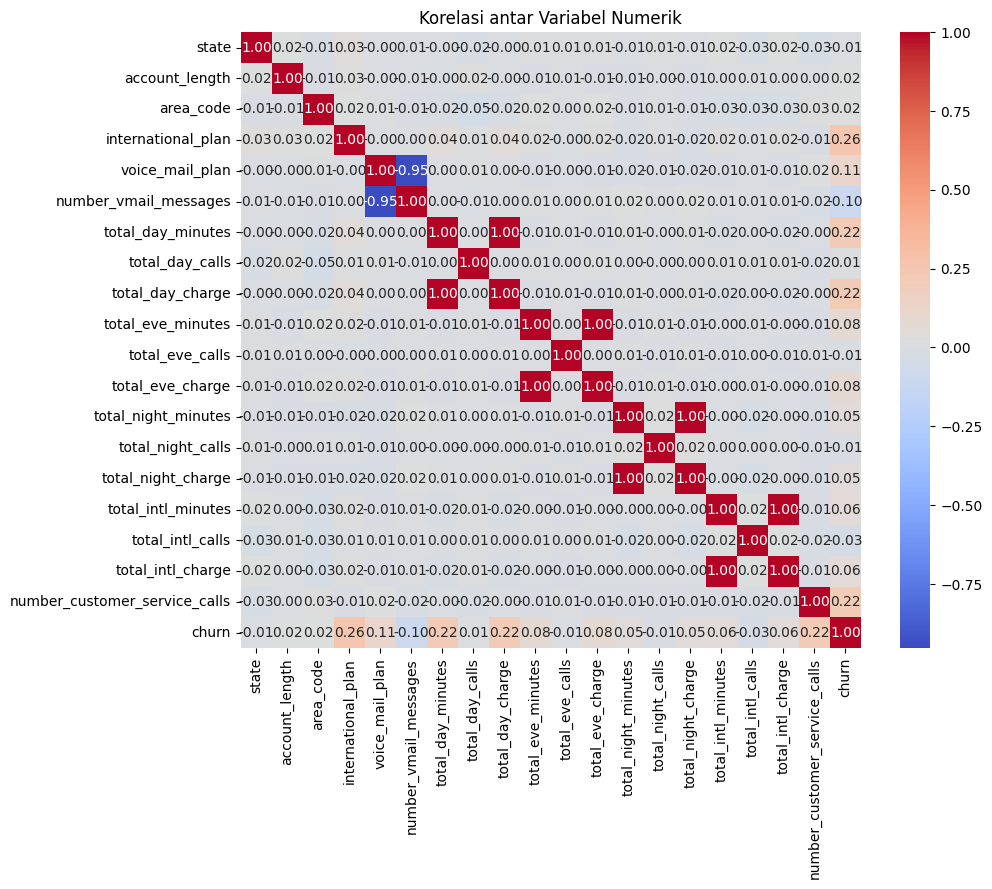

In [ ]:
# correlation matrix each variable

corr = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi antar Variabel Numerik")
plt.show()



1.   Strong Positive Correlation (Red squares near 1.0)


> Variabel-variabel ini cenderung bergerak ke arah yang sama. Peningkatan pada satu variabel kemungkinan besar berhubungan dengan peningkatan variabel lainnya.


2.   Strong Negative Correlation (Blue squares near -1.0)


> Variabel-variabel ini bergerak berlawanan arah. Peningkatan pada salah satu hal kemungkinan besar berhubungan dengan penurunan pada hal lainnya.


3.   Weak Correlation (Values close to 0.0)


> Ada sedikit atau tidak ada hubungan antara variabel-variabel ini. Perubahan pada salah satu aspek tidak akan banyak dipengaruhi oleh perubahan lainnya.

4.  Conclussion


> Strong Positive Correlation


*   total_day_minute <--> total_day_change
*   total_eve_minute <--> total_eve_charge
*   total_night_minute <--> total_night_charge
*   total_inti_minute <--> total_inti_charge

> Strong Negative Correlation


*   voice_mail_plan <--> number_vmail_massage
















In [ ]:
# Distribution Numeric Variable Analysis
numeric_variables = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
                     'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
                     'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

# Desc Statistic
numeric_description = train[numeric_variables].describe()
print(numeric_description.to_string())

       account_length  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  number_customer_service_calls
count     4250.000000            4250.000000        4250.000000      4250.000000       4250.000000        4250.000000      4250.000000       4250.000000          4250.000000        4250.000000         4250.000000         4250.000000       4250.000000        4250.000000                    4250.000000
mean       100.236235               7.631765         180.259600        99.907294         30.644682         200.173906       100.176471         17.015012           200.527882          99.839529            9.023892           10.256071          4.426353           2.769654                       1.559059
std         39.698401              13.439882          54.012373        19.850817          9.18209

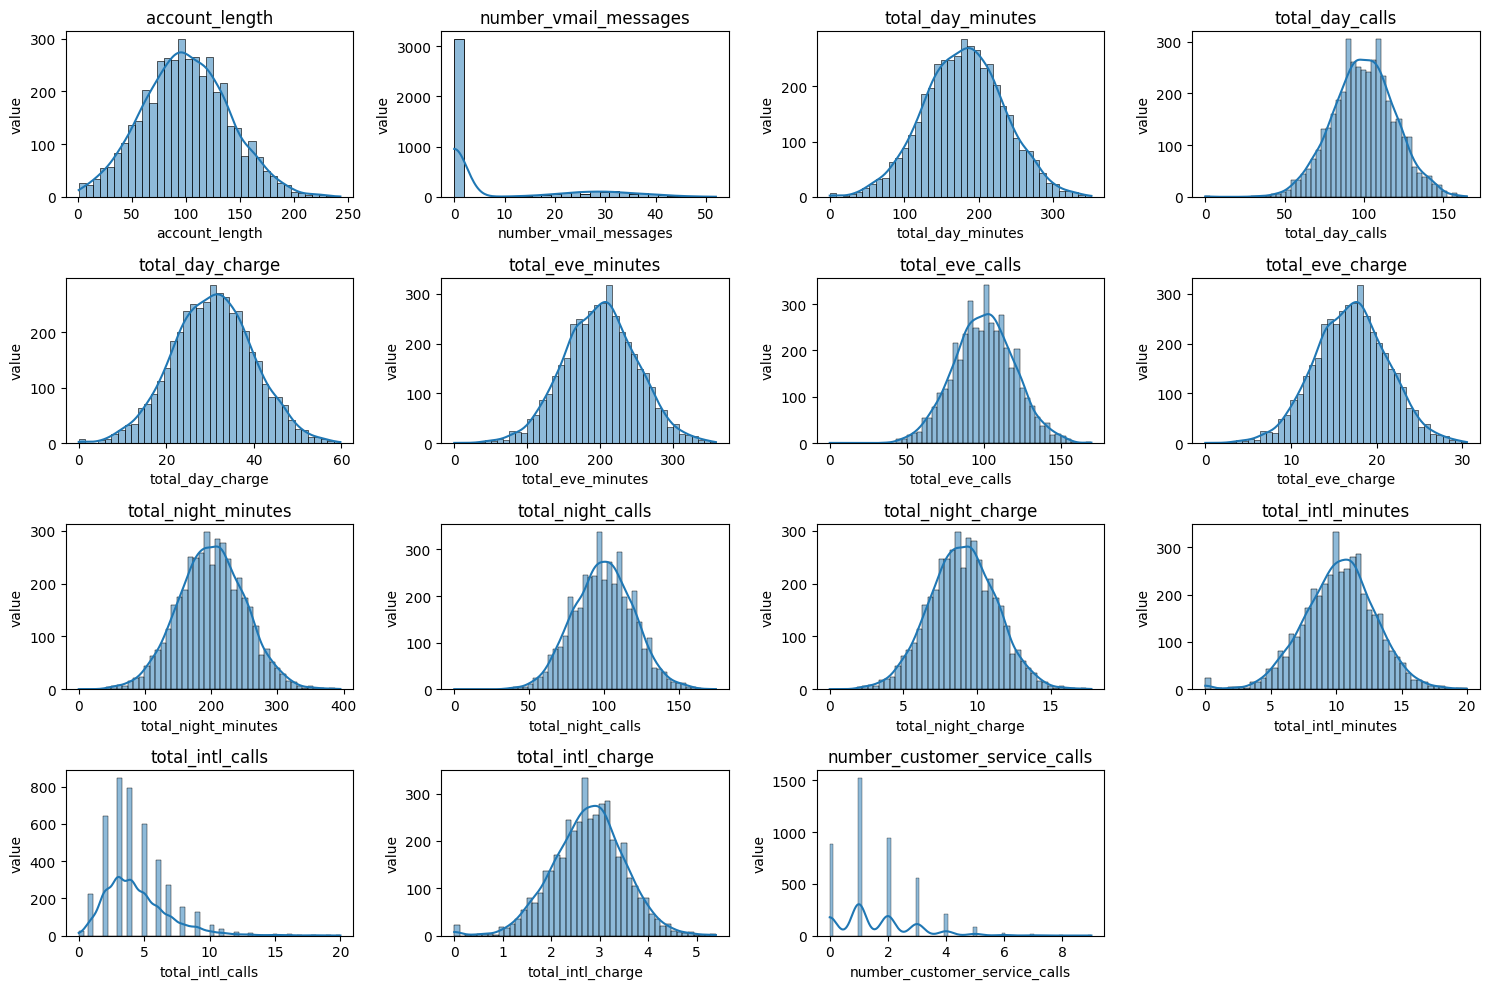

In [ ]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(numeric_variables, 1):
    plt.subplot(4, 4, i)
    sns.histplot(train[var], kde=True)
    plt.title(var)
    plt.ylabel('value')
plt.tight_layout()
plt.show()



1.   Tampaknya ada positive correlation antara account length dan the number of calls pada setiap periode waktu. Artinya, user dengan longer account lengths cenderung melakukan lebih banyak panggilan.
2.   Penyebaran data point lebih luas untuk kategori  account lengths, evening calls and total minutes categories. Artinya, data memiliki varian yang lebih tinggi untuk kategori-kategori tersebut.
3.   Untuk semua kategori  (total day calls, total day minutes, total eve calls, total eve minutes, total night calls, total night minutes, total intl calls) menunjukan data point mengelompok di sekitar garis diagonal, dengan beberapa outlier. Hal ini menunjukkan korelasi positif.


> Conclussion:


Data tampaknya mengikuti distribusi normal untuk sebagian besar fitur, dengan kurva berbentuk lonceng yang berpusat di sekitar mean.

In [ ]:
# Distribution Categorical Variable Analysis
categorical_variables = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

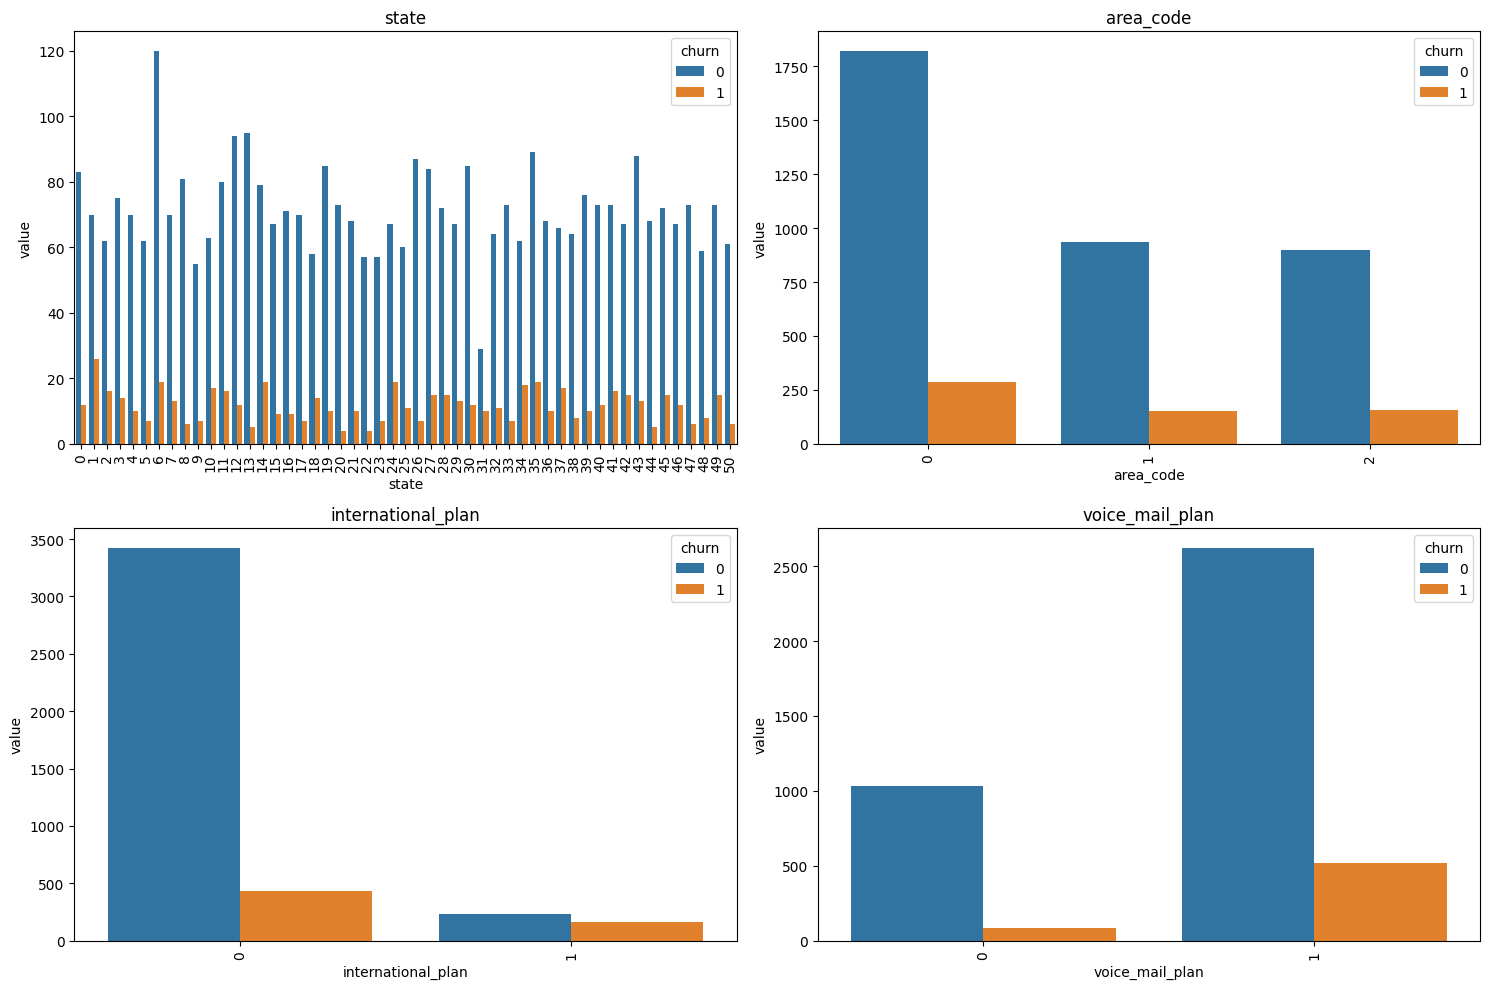

In [ ]:
# Sum of Unique and freq each var
for var in categorical_variables:
    train[var].value_counts()

# Categorical Analysis by Churn
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='churn', data=train)
    plt.title(var)
    plt.ylabel('value')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


> Note

Pemilihan variabel target dalam analisis dataset cukup penting karena variabel target akan menjadi fokus utama dalam memahami pola dan perilaku data. Dalam kasus ini, variabel target adalah 'churn', yang merupakan indikator apakah pelanggan meninggalkan layanan (berhenti langganan) atau tetap menggunakan layanan.


In [ ]:
# Skewness
skewness = train.skew()
print("Skewness:")
print(skewness)

Skewness:
state                            0.032574
account_length                   0.122327
area_code                        0.487104
international_plan               2.800109
voice_mail_plan                 -1.084960
number_vmail_messages            1.373091
total_day_minutes               -0.006910
total_day_calls                 -0.085812
total_day_charge                -0.006913
total_eve_minutes               -0.030415
total_eve_calls                 -0.020812
total_eve_charge                -0.030388
total_night_minutes              0.008491
total_night_calls                0.005273
total_night_charge               0.008445
total_intl_minutes              -0.241360
total_intl_calls                 1.360122
total_intl_charge               -0.241671
number_customer_service_calls    1.082692
churn                            2.067314
dtype: float64


Dalam analisis data yang diberikan, kita dapat melihat skewness (kekakuan) dari setiap variabel dalam dataset. Skewness mengacu pada seberapa simetris distribusi variabel tersebut. Nilai skewness yang positif menunjukkan distribusi miring ke kanan, sedangkan nilai skewness yang negatif menunjukkan distribusi miring ke kiri.


> Data Interpretation

1.   Distribusi variabel 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_intl_calls','number_customer_service_calls', dan 'churn' cenderung tidak simetris
2.   Variabel 'area_code', 'total_intl_minutes', dan 'total_intl_charge' memiliki sedikit kemiringan ke kanan.
3.   Variabel-variabel lainnya memiliki distribusi yang relatif simetris.





<ipython-input-97-b33fdbb87d0c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(column_labels, rotation=90)


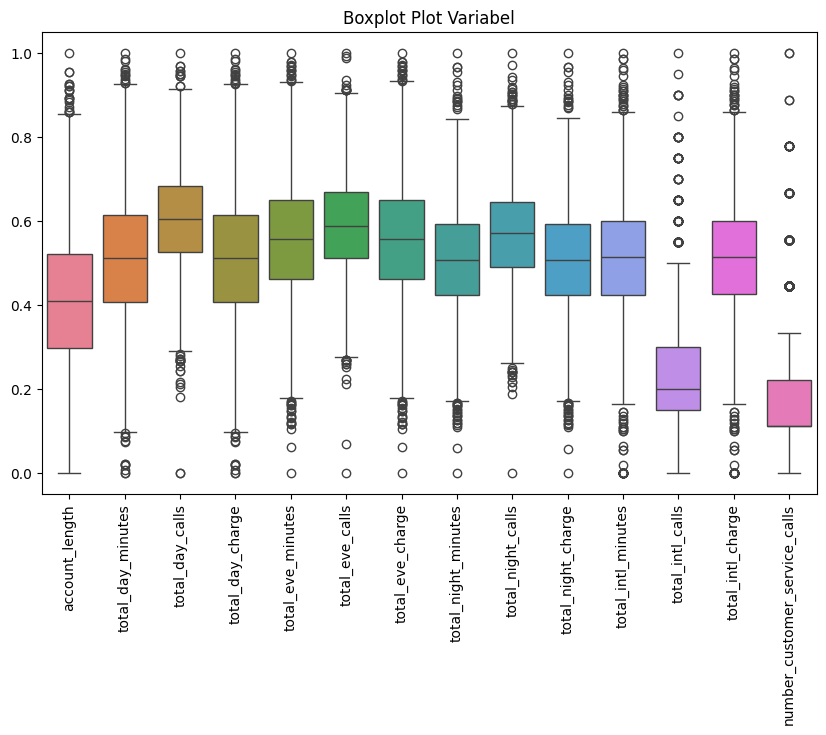

In [ ]:
scaller = MinMaxScaler()
train_scaled = scaller.fit_transform(train[['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge','number_customer_service_calls']])
column_labels = ['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge','number_customer_service_calls']

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=train_scaled)
ax.set_xticklabels(column_labels, rotation=90)
plt.title("Boxplot Plot Variabel")
plt.show()


In [ ]:
# Desc Scalling Data
min_values = np.min(train_scaled, axis=0)
max_values = np.max(train_scaled, axis=0)
median_values = np.median(train_scaled, axis=0)
mean_values = np.mean(train_scaled, axis=0)
q1_values = np.percentile(train_scaled, 25, axis=0)
q3_values = np.percentile(train_scaled, 75, axis=0)

# Show Desc Statistics
for i, label in enumerate(column_labels):
    print(f"{label}:")
    print(f"  Min: {min_values[i]}")
    print(f"  Q1: {q1_values[i]}")
    print(f"  Median: {median_values[i]}")
    print(f"  Mean: {mean_values[i]}")
    print(f"  Q3: {q3_values[i]}")
    print(f"  Max: {max_values[i]}")
    print()

account_length:
  Min: 0.0
  Q1: 0.2975206611570248
  Median: 0.4090909090909091
  Mean: 0.41006708799222175
  Q3: 0.5206611570247934
  Max: 1.0

total_day_minutes:
  Min: 0.0
  Q1: 0.4077524893314367
  Median: 0.5133712660028449
  Mean: 0.5128295874822191
  Q3: 0.6150782361308678
  Max: 1.0

total_day_calls:
  Min: 0.0
  Q1: 0.5272727272727272
  Median: 0.6060606060606061
  Mean: 0.605498752228164
  Q3: 0.6848484848484848
  Max: 1.0

total_day_charge:
  Min: 0.0
  Q1: 0.40771419009370813
  Median: 0.5133868808567604
  Mean: 0.5127958894401135
  Q3: 0.6149598393574297
  Max: 1.0

total_eve_minutes:
  Min: 0.0
  Q1: 0.4618007236292791
  Median: 0.5585861397161146
  Mean: 0.5571219200733452
  Q3: 0.6506401335930977
  Max: 0.9999999999999999

total_eve_calls:
  Min: 0.0
  Q1: 0.5117647058823529
  Median: 0.5882352941176471
  Mean: 0.589273356401384
  Q3: 0.6705882352941176
  Max: 1.0

total_eve_charge:
  Min: 0.0
  Q1: 0.46177144728225283
  Median: 0.5586116568434839
  Mean: 0.55713856465


> Scaller Conclussion

*   Kesimpulannya, dari statistik deskriptif tersebut,kita dapat melihat sebaran data untuk setiap variabel dan melihat bahwa sebagian besar variabel cenderung berkumpul di antara quartile pertama dan ketiga, menunjukkan distribusi data yang cukup seragam




# Modelling

## Split Data

In [ ]:
y_train = train.pop('churn')

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train, y_train, test_size=0.2, random_state=200)
print("Split Train data to df_train and df_val")
print(f"Train data has: {x_train.shape[0]} rows and {x_train.shape[1]} columns")
print(f"Validation data has: {x_val.shape[0]} rows and {x_val.shape[1]} columns")

Split Train data to df_train and df_val
Train data has: 3400 rows and 19 columns
Validation data has: 850 rows and 19 columns


## SVM

### Training

In [ ]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(x_train,y_train)

SVC()

### Testing

In [ ]:
y_pred_svm = svm_model.predict(x_val)

In [ ]:
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Evaluate

In [ ]:
evaluate_svm = accuracy_score(y_val, y_pred_svm)
print("Accuracy SVM = ", evaluate_svm *100 ,"%")

Accuracy SVM =  86.82352941176471 %


## KNN

### Training

In [ ]:
k = 7
knn_model = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=7)

### Testing

In [ ]:
y_pred_knn = knn_model.predict(x_val)

### Evaluate

In [ ]:
evaluate_knn = accuracy_score(y_val, y_pred_knn)
print("Accuracy KNN = ", evaluate_knn *100 ,"%")

Accuracy KNN =  89.05882352941177 %


### Mencari nilai K terbaik

In [ ]:
Ks = 10
acc = np.zeros((Ks))
for n in range(1,Ks+1):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_pred_knn = neigh.predict(x_val)
    acc[n-1] = accuracy_score(y_val, y_pred_knn)

for n in range(Ks):
  print("K = ",n+1, " Acc = ", acc[n]*100, "%")

K =  1  Acc =  81.17647058823529 %
K =  2  Acc =  87.6470588235294 %
K =  3  Acc =  88.23529411764706 %
K =  4  Acc =  89.05882352941177 %
K =  5  Acc =  88.94117647058823 %
K =  6  Acc =  89.17647058823529 %
K =  7  Acc =  89.05882352941177 %
K =  8  Acc =  88.47058823529412 %
K =  9  Acc =  88.8235294117647 %
K =  10  Acc =  88.47058823529412 %


Terlihat bahwa nilai k yang terbaik yaitu 6 dengan akurasi sebesar 89.176 %

## Decision Tree

### Training

In [ ]:
decisiontree_model = DecisionTreeClassifier().fit(x_train,y_train)
decisiontree_model

DecisionTreeClassifier()

### Testing

In [ ]:
y_pred_decisiontree = decisiontree_model.predict(x_val)

### Evaluate

In [ ]:
evaluate_decisiontree = accuracy_score(y_val, y_pred_decisiontree)
print("Accuracy Decision Tree = ", evaluate_decisiontree *100 ,"%")

Accuracy Decision Tree =  92.47058823529412 %


## Hasil : Terlihat bahwa model Decision Tree lebih baik dibandingkan model SVM dan KNN maka untuk melakukan prediksi data testing digunakan model Decision Tree


# Prediction

In [ ]:
test = test.drop(['id'],axis = 1)

In [ ]:
test

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,128,0,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,118,1,1,1,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,2,62,0,0,1,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,3,93,1,0,1,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,4,174,0,0,1,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,7,130,0,0,1,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,21,73,2,0,1,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,45,152,0,0,1,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,43,61,0,0,1,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
y_pred_testing = decisiontree_model.predict(test)
y_pred_testing

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,